In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import nose.tools
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# DOES TERRORISM AFFECT ON THE COUNTRIES AND HOW ? IS THERE ANY DEPENDENCY BETWEEN TERRORISM AND THE ECONOMIC , THE SUICIDE AND THE HOMICIDE RATE OF THE COUNTRIES ?

![](http://cdn.statcdn.com/Infographic/images/normal/26970.jpeg)

# Abstract

The purpose of this research is to find if there is any dependency betweeen terrorism and the rate of suicide,homicide and the GDP of the countries.Also we can see if the terrorism affects the countries in our databases. As we know from previous researches terrorism can cause countries to suffer from 14% decline of GDP over 21 years. Every country that experienced terrorism lose a lot of tourists , have increased insurance claims , also people can have suicidal toughts because of the news of terrorism which leads to bigger suicide rate.Also the suicide rate can be increased a little because of the terrorist that practise the kamikaze method to make their attacks. Increasing the nationalism and foreign skepticism may lead to confrontations between native and foreign people which can cause people making crime and even homicide.In my opinion the most crucial part takes the economic of the country, so we might make assumption that the more terrorist attacks we've got the lower economic growth we see. Every aspect in our databases is affected. The research can be useful to get information about country that we might wanna see or live in. 

# Introduction

In this research we will analyse the two datasets about GDP , homicide and suicide rate of the countries and the global terrorism dataset. Let's make an assumption that the poorest country with low GDP will have high homicide rate. The research will also try to find the country with highest GDP and the lowest suicide rate.We will check if there is really a dependency between the terrorism , GDP , suicide , homicide rate. Also from our knowledge we can make an assumption that maybe the poorest countries can have more terrorism attacks. Other assumption we can make is that countries with high homicide rate can be also a home to a terrorist groups.

## Table of Contents
1. [Reading and describing the datasets](#1.-Reading-and-describing-the-datasets)
2. [Data tidying and cleaning](#2.-Data-Tidying-and-Cleaning)
3. [Grouping and presenting data](#3.-Grouping-and-Presenting-Data)
    - [3.1. Suicide Homicide GDP](#SUICIDE-HOMICIDE-GDP)
    - [3.2. Terrorism](#TERRORISM)
    - [3.3. Heatmaps](#HEATMAPS)
4. [Machine learning model](#4.-Machine-Learning-Model)
5. [Conclusion](#5.-Conclusion)
6. [Refferences](#6.-Refferences)

# 1. Reading and Describing The Datasets

In [2]:
#Homicide rate, Suicide rate and GDP dataset
suicide_homicide_gdp = pd.read_csv("suicide_homicide_gdp.csv", sep=',', decimal='.')
#Global terrorism dataset
global_terrorism = pd.read_csv("global_terorism.csv", encoding='ISO-8859-1',low_memory=False)

In [3]:
suicide_homicide_gdp.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


In [4]:
global_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
suicide_homicide_gdp.dtypes

country                                             object
iso3c                                               object
iso2c                                               object
year                                                 int64
Intentional homicides (per 100,000 people)         float64
Suicide mortality rate (per 100,000 population)    float64
GDP (current US$)                                  float64
GDP per capita, PPP (current international $)      float64
adminregion                                         object
incomeLevel                                         object
dtype: object

In [6]:
global_terrorism.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [7]:
suicide_homicide_gdp.shape

(13566, 10)

In [8]:
global_terrorism.shape

(181691, 135)

# 2. Data Tidying and Cleaning

As we see upwards one of the dataset have some NaN values which makes the dataset bigger than it should be. Features with no observations or products with no name are not suitable for a proper data research. This leads us to clean the datasets so it could be easier for us to do our research properly.

First we will remove the NaN values , afterwards we will look for unnecessary columns or any data that is not helping us with the research.

In [9]:
#Lets check how many NaN values are in the suicide , homicide and GDP dataset
suicide_homicide_gdp.isnull().sum()

country                                               0
iso3c                                               102
iso2c                                               153
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64

In [10]:
#Lets check if there is any NaN values in global terrorism dataset
global_terrorism.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
#As we see from our previous operation we should get rid of the missing values 
suicide_homicide_gdp = suicide_homicide_gdp.dropna()  # droping all empty columns/features 

In [78]:
nose.tools.assert_not_equal(suicide_homicide_gdp.shape,(13566, 10))

In [13]:
#We've got 135 columns which is little bit too much. 
#So to be easier we will rename and get only the columns which will help us with the research.
global_terrorism = global_terrorism.rename(columns={'iyear':'Year',
                     'imonth':'Month',
                     'iday':'Day',
                     'country_txt':'Country',
                     'provstate':'State',
                     'region_txt':'Region',
                     'attacktype1_txt':'AttackType',
                     'target1':'Target',
                     'success':'Success',
                     'nkill':'Killed',
                     'nwound':'Wounded',
                     'summary':'Summary',
                     'gname':'Group',
                     'targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type',
                     'motive':'Motive'})

In [14]:
needed_columns = ['Year','Month','Day','Country','State','Region','AttackType','Target','Success','Killed','Wounded','Summary',
                 'Group','Target_type','Weapon_type','Motive']

In [15]:
global_terrorism = global_terrorism[needed_columns]

In [16]:
nose.tools.assert_not_equal(global_terrorism.shape[1],(135)) # TESTING TO MAKE SURE CLEANING IS DONE PROPERLY

In [17]:
global_terrorism = global_terrorism.dropna()

In [18]:
for column in global_terrorism.columns:
    nose.tools.assert_equal(global_terrorism[column].isna().sum(), 0) # TESTING TO MAKE SURE WE GET RID OF THE NaN VALUES

# 3. Grouping and Presenting Data

## SUICIDE HOMICIDE GDP 

Let's group and check the relationships between the GDP , homicide and suicide rate so we can get a conclusion. We've made an assumption that richer countries may have higher GDP and lower homicide rate.So let's begin with that. We will group the 2 columns so we can see how are they related and what they will show to us.

<AxesSubplot:xlabel='GDP (current US$)', ylabel='Intentional homicides (per 100,000 people)'>

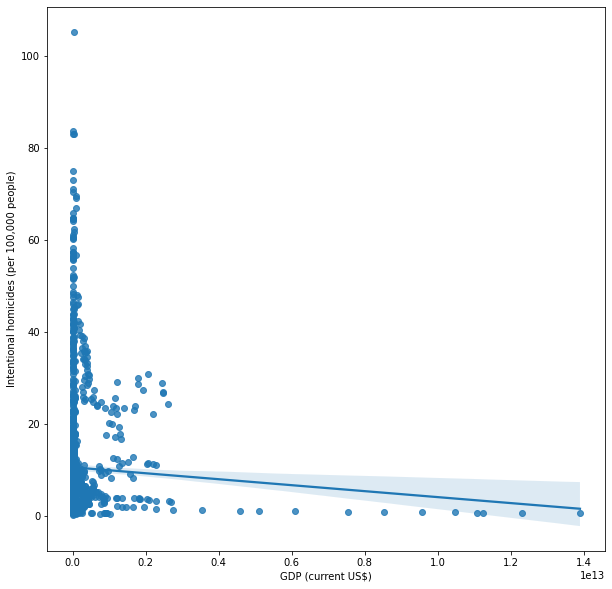

In [19]:
plt.figure(figsize=(10,10))
sns.regplot(x=suicide_homicide_gdp['GDP (current US$)'], y=suicide_homicide_gdp['Intentional homicides (per 100,000 people)'])

#### As we see this regplot have a negative slope which gives us the information and prove our assumption- lower homicides in richer countries.

The good environment in the richer countries may have give opprotunites for a better life. So that makes me to think that richer countries may have lower suicide rate.Let's check this. 

<AxesSubplot:xlabel='GDP (current US$)', ylabel='Suicide mortality rate (per 100,000 population)'>

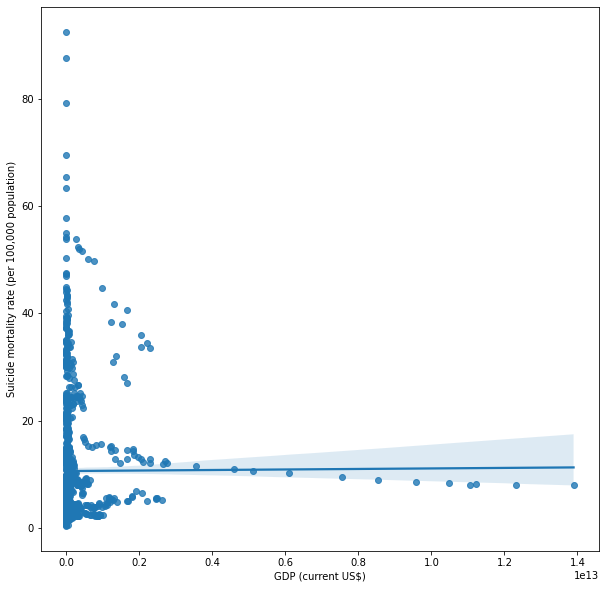

In [20]:
plt.figure(figsize=(10,10))
sns.regplot(x=suicide_homicide_gdp['GDP (current US$)'], 
            y=suicide_homicide_gdp['Suicide mortality rate (per 100,000 population)'])

#### Although the regression wasn't very useful, it's interesting to note that the most violent countries are all poor and the richest countries are all low on the violence scale.

Let's try to use the column "per capita GDP" and check if the regressions will be different somehow and if that will strengthen the point.

<AxesSubplot:xlabel='GDP per capita, PPP (current international $)', ylabel='Suicide mortality rate (per 100,000 population)'>

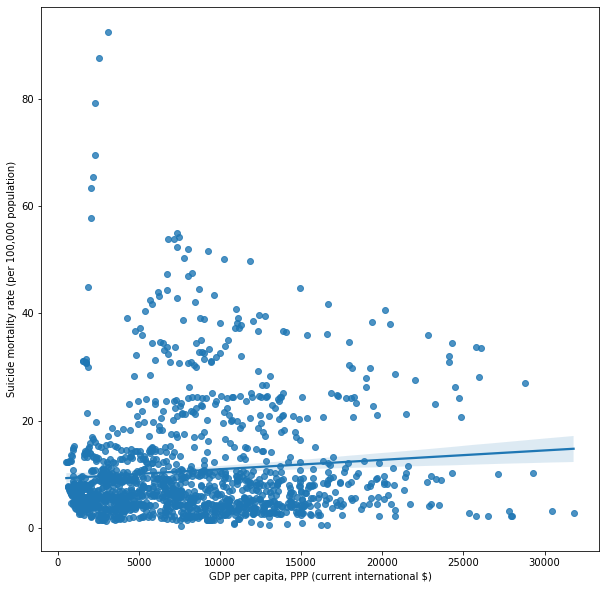

In [21]:
plt.figure(figsize=(10,10))
sns.regplot(x=suicide_homicide_gdp['GDP per capita, PPP (current international $)'], 
            y=suicide_homicide_gdp['Suicide mortality rate (per 100,000 population)'])

#### Now we can clearly see the positive slope which disprove our assumption about the suicide rate in the richer countries. The regplot gives us the information that richer countries have bigger suicide rate.

In [22]:
variables = ['Intentional homicides (per 100,000 people)','Suicide mortality rate (per 100,000 population)',
 'GDP (current US$)','GDP per capita, PPP (current international $)']

In [23]:
def plot_crime_gdp_rates(suicide_homicide_gdp, variables, title=''):
    plt.figure(figsize=(20,13))
    for i, y in enumerate(variables):
        axi = plt.subplot(2, 2, i+1)
        sns.lineplot(ax=axi, data=suicide_homicide_gdp[suicide_homicide_gdp.year.between(2000,2016)],x="year",y=y)
        axi.set_ylabel(y)
        axi.set_title(title)

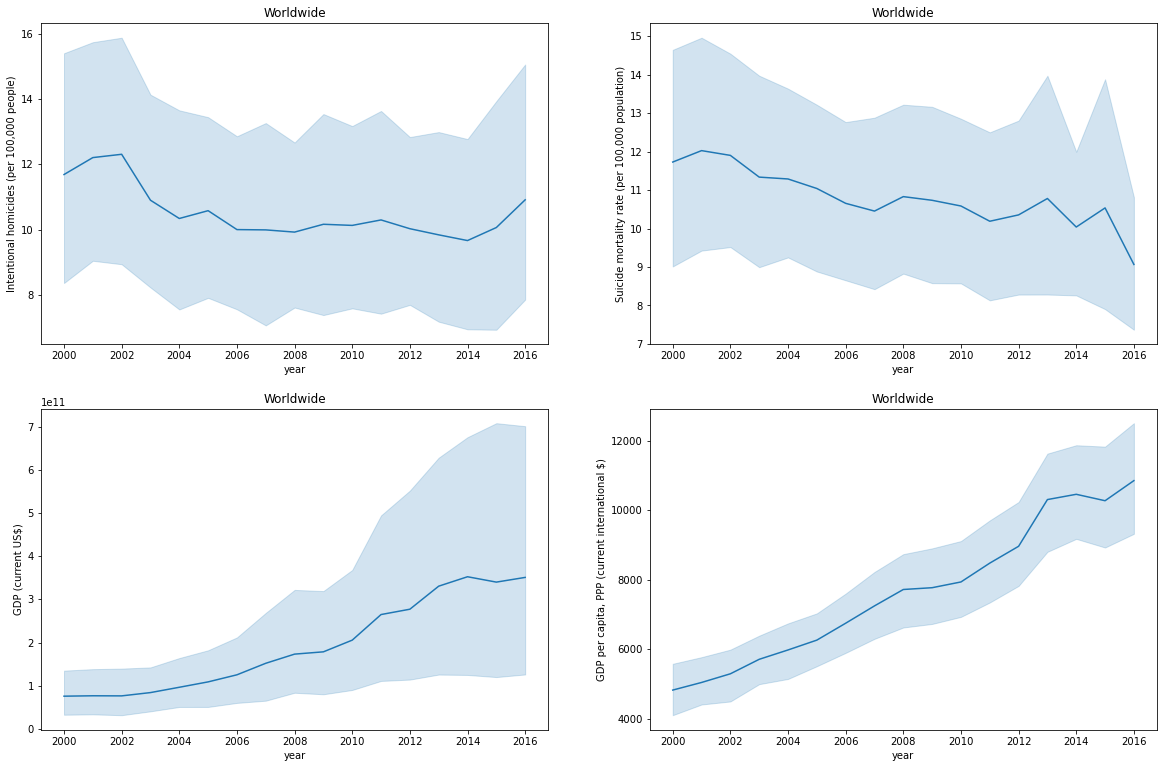

In [24]:
title = 'Worldwide'
plot_crime_gdp_rates(suicide_homicide_gdp, variables, title)

#### Graphically, looks like the intentional homicides and suicide mortality rates tend to drop as the GDP and GDP per capita increases. Which make us to think that GDP is really important for every country not only for the economical part but for some other aspects like the suicide and homicide of the country.

In [25]:
country_mean =  suicide_homicide_gdp.groupby(["country","iso3c","adminregion","incomeLevel"])["Intentional homicides (per 100,000 people)"].mean().reset_index()
top10_homicide = country_mean.sort_values("Intentional homicides (per 100,000 people)", ascending=False).head(10)
top10_homicide

,country,iso3c,adminregion,incomeLevel,"Intentional homicides (per 100,000 people)"
29,El Salvador,SLV,Latin America & Caribbean (excluding high income),Lower middle income,62.048729
40,Honduras,HND,Latin America & Caribbean (excluding high income),Lower middle income,56.976382
45,Jamaica,JAM,Latin America & Caribbean (excluding high income),Upper middle income,46.629342
24,Colombia,COL,Latin America & Caribbean (excluding high income),Upper middle income,40.743651
52,Lesotho,LSO,Sub-Saharan Africa (excluding high income),Lower middle income,37.606002
85,South Africa,ZAF,Sub-Saharan Africa (excluding high income),Upper middle income,36.761111
68,Nigeria,NGA,Sub-Saharan Africa (excluding high income),Lower middle income,34.524046
36,Guatemala,GTM,Latin America & Caribbean (excluding high income),Upper middle income,34.255667
9,Belize,BLZ,Latin America & Caribbean (excluding high income),Lower middle income,32.074210
15,Brazil,BRA,Latin America & Caribbean (excluding high income),Upper middle income,25.640249


In [26]:
for rows in top10_homicide.count():
    nose.tools.assert_equal(rows, 10) # TESTING TO MAKE SURE WE GET 10 COUNTRIES

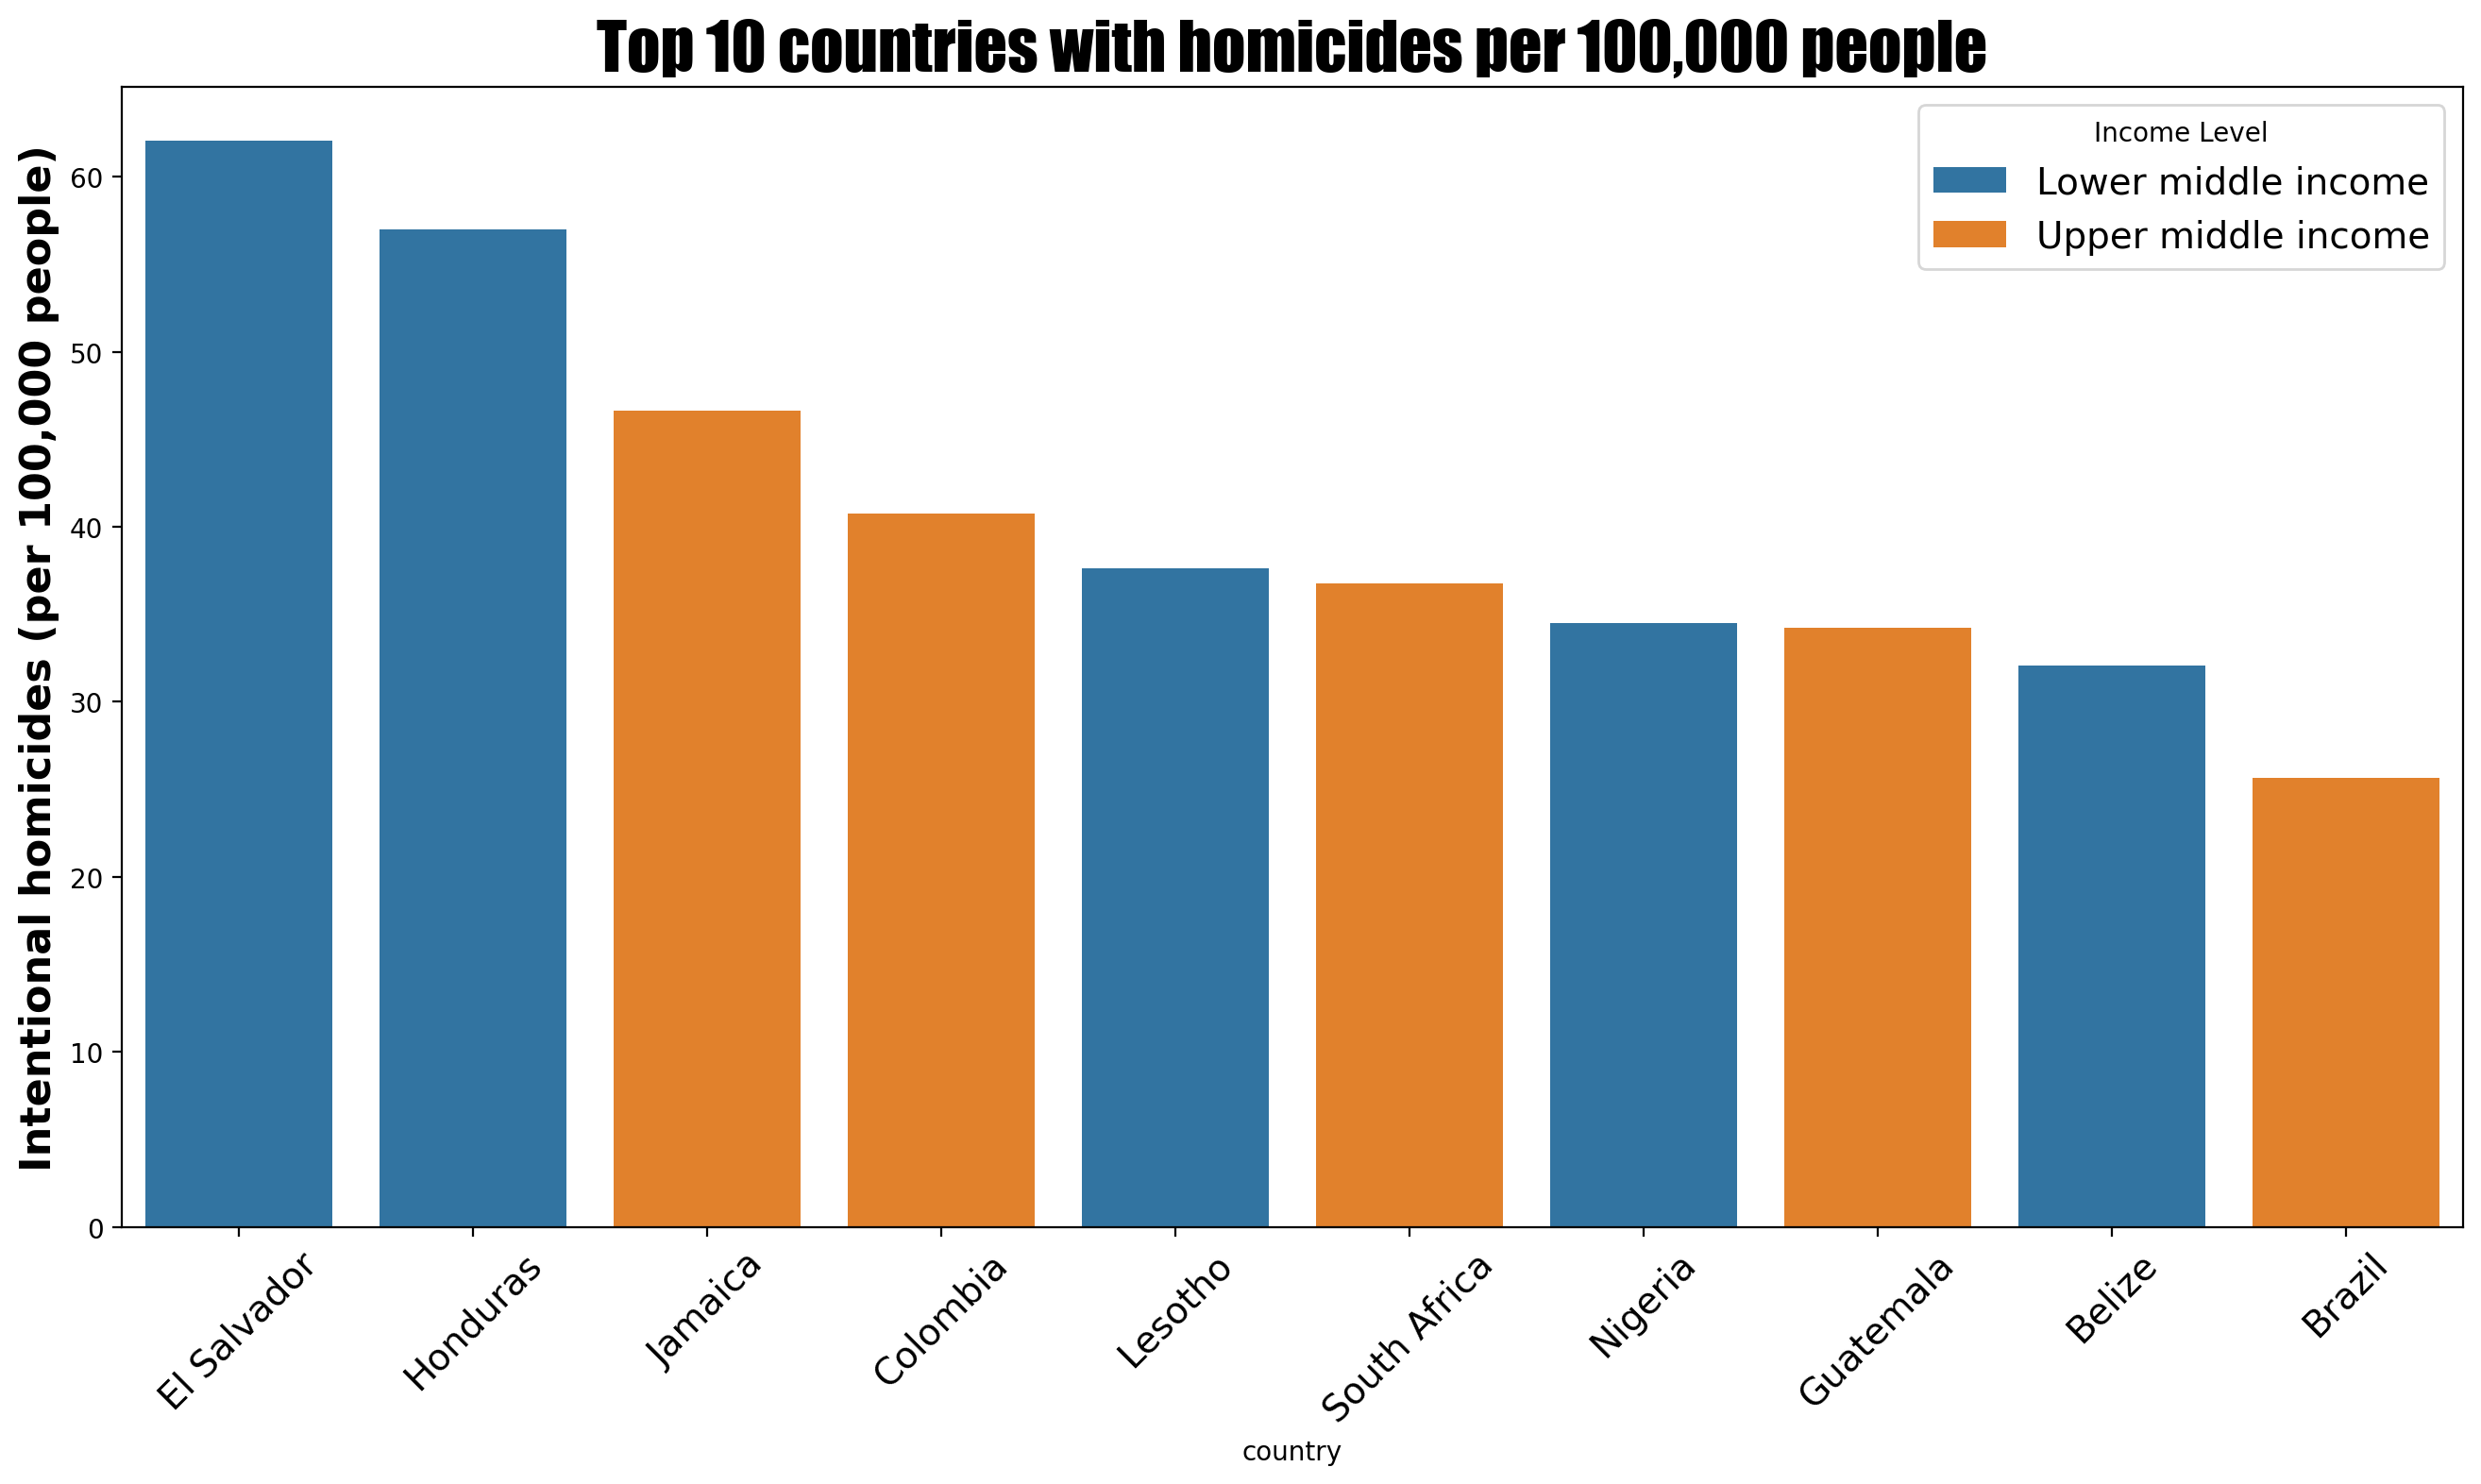

In [27]:
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with homicides per 100,000 people", fontname="Impact", fontsize=25)
sns.barplot(data = top10_homicide, y= "Intentional homicides (per 100,000 people)", x = "country", hue="incomeLevel", 
            dodge=False)
plt.legend(fontsize=14, title="Income Level")
plt.show()

We can clearly see that almost all of the countries are from Latin-America. The first two in the list are poor countries which makes us thinks that they may have experienced terrorist attacks. Also some of the countries in the list can be in the top 10 of the countries with the most terrorist atacks. 

In [28]:
country_mean =  suicide_homicide_gdp.groupby(["country","iso3c","adminregion","incomeLevel"])["Suicide mortality rate (per 100,000 population)"].mean().reset_index()
top10_suicide = country_mean.sort_values("Suicide mortality rate (per 100,000 population)", ascending=False).head(10)
top10_suicide

,country,iso3c,adminregion,incomeLevel,"Suicide mortality rate (per 100,000 population)"
52,Lesotho,LSO,Sub-Saharan Africa (excluding high income),Lower middle income,70.012500
30,Eswatini,SWZ,Sub-Saharan Africa (excluding high income),Lower middle income,42.338889
77,Russian Federation,RUS,Europe & Central Asia (excluding high income),Upper middle income,40.489474
8,Belarus,BLR,Europe & Central Asia (excluding high income),Upper middle income,34.715789
38,Guyana,GUY,Latin America & Caribbean (excluding high income),Upper middle income,34.273684
47,Kazakhstan,KAZ,Europe & Central Asia (excluding high income),Upper middle income,31.457143
49,Kiribati,KIR,East Asia & Pacific (excluding high income),Lower middle income,30.885714
101,Ukraine,UKR,Europe & Central Asia (excluding high income),Lower middle income,30.428571
14,Botswana,BWA,Sub-Saharan Africa (excluding high income),Upper middle income,30.340000
85,South Africa,ZAF,Sub-Saharan Africa (excluding high income),Upper middle income,24.288889


In [29]:
for rows in top10_suicide.count():
    nose.tools.assert_equal(rows, 10) # TESTING TO MAKE SURE WE GET 10 COUNTRIES

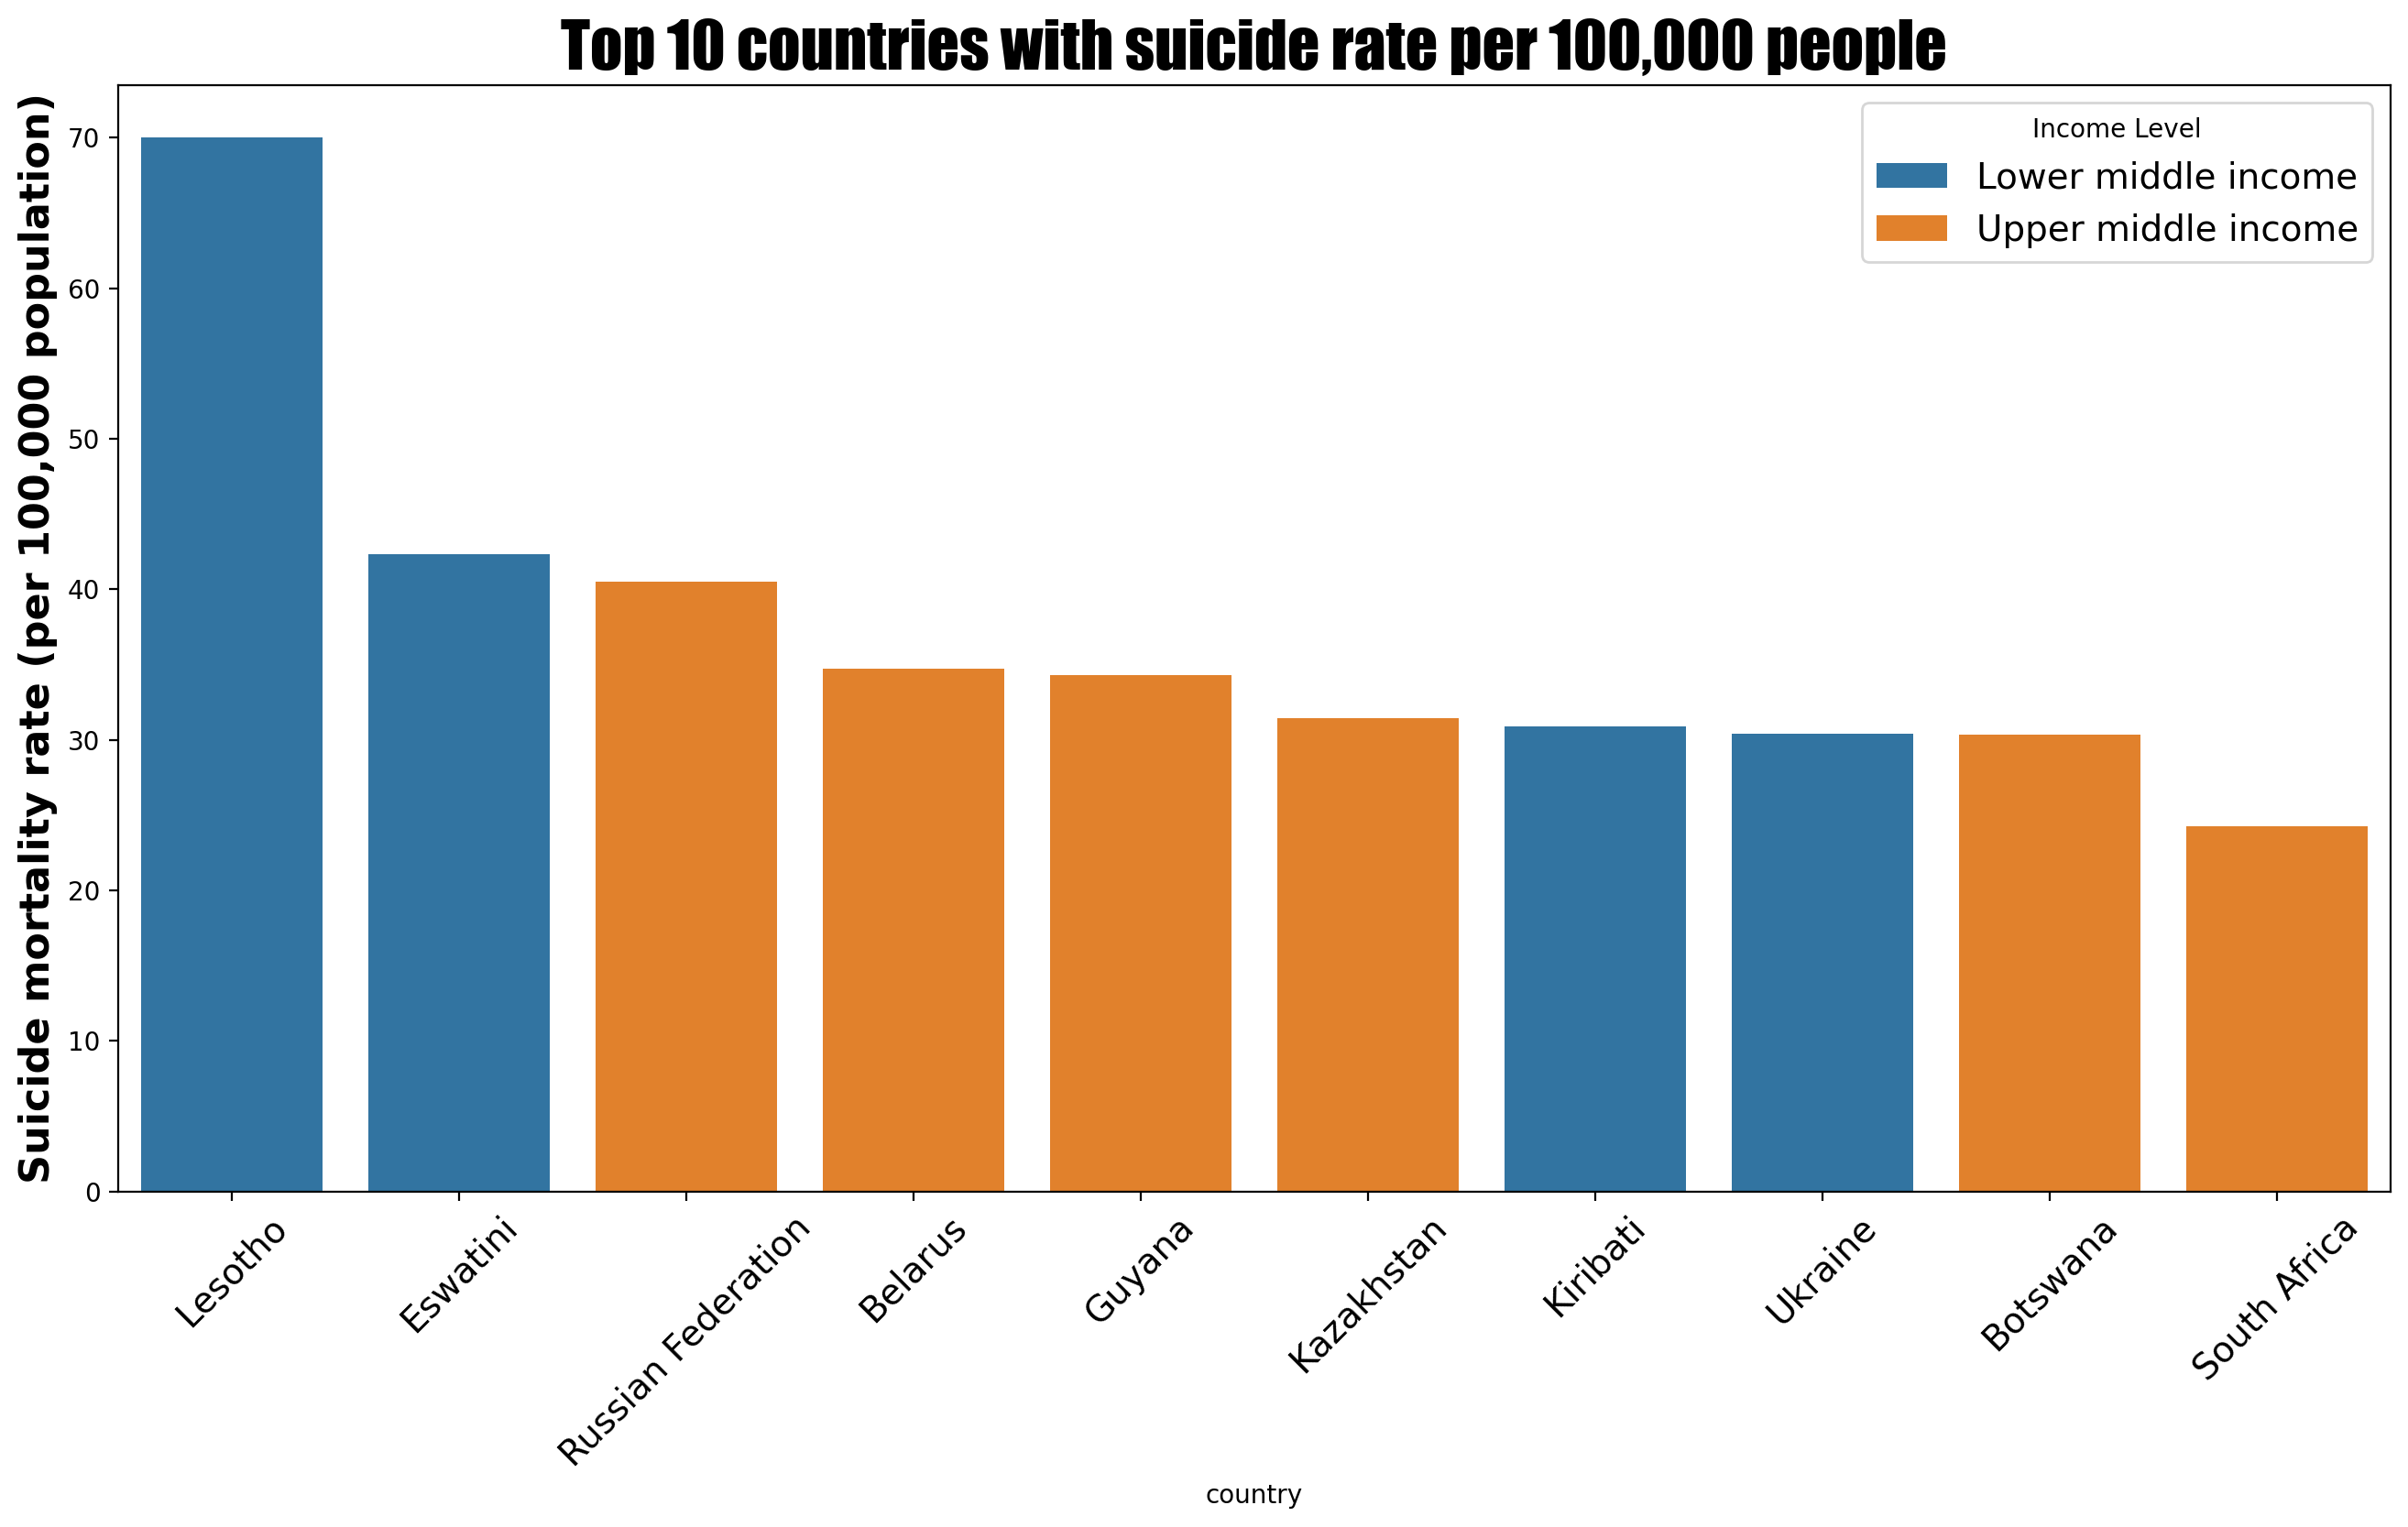

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with suicide rate per 100,000 people", fontname="Impact", fontsize=25)
sns.barplot(data = top10_suicide, y= "Suicide mortality rate (per 100,000 population)", x = "country", hue="incomeLevel", 
            dodge=False)
plt.legend(fontsize=14, title="Income Level")
plt.show()

#### We see the same thing as the previous barplot. The first 2 countries are poor and may have terrorist groups and attacks. The first of the countries have a big difference from the second one, almost twice bigger rate has got Lesotho than Eswatini. Different from the previous barplot now we've got mixed regions.

In [31]:
country_mean =  suicide_homicide_gdp.groupby(["country","iso3c","adminregion","incomeLevel"])["GDP per capita, PPP (current international $)"].mean().reset_index()
top10_richest_country_to_live_in = country_mean.sort_values("GDP per capita, PPP (current international $)", ascending=False).head(10)
top10_richest_country_to_live_in

,country,iso3c,adminregion,incomeLevel,"GDP per capita, PPP (current international $)"
98,Turkey,TUR,Europe & Central Asia (excluding high income),Upper middle income,18532.330183
77,Russian Federation,RUS,Europe & Central Asia (excluding high income),Upper middle income,18264.779220
55,Malaysia,MYS,East Asia & Pacific (excluding high income),Upper middle income,17833.546120
47,Kazakhstan,KAZ,Europe & Central Asia (excluding high income),Upper middle income,17541.153634
4,Argentina,ARG,Latin America & Caribbean (excluding high income),Upper middle income,17082.953470
71,Panama,PAN,Latin America & Caribbean (excluding high income),Upper middle income,16728.305563
76,Romania,ROU,Europe & Central Asia (excluding high income),Upper middle income,15834.865927
57,Mauritius,MUS,Sub-Saharan Africa (excluding high income),Upper middle income,15696.224479
58,Mexico,MEX,Latin America & Caribbean (excluding high income),Upper middle income,15212.841012
51,Lebanon,LBN,Middle East & North Africa (excluding high inc...,Upper middle income,14919.114637


In [32]:
for rows in top10_richest_country_to_live_in.count():
    nose.tools.assert_equal(rows, 10) # TESTING TO MAKE SURE WE GET 10 COUNTRIES

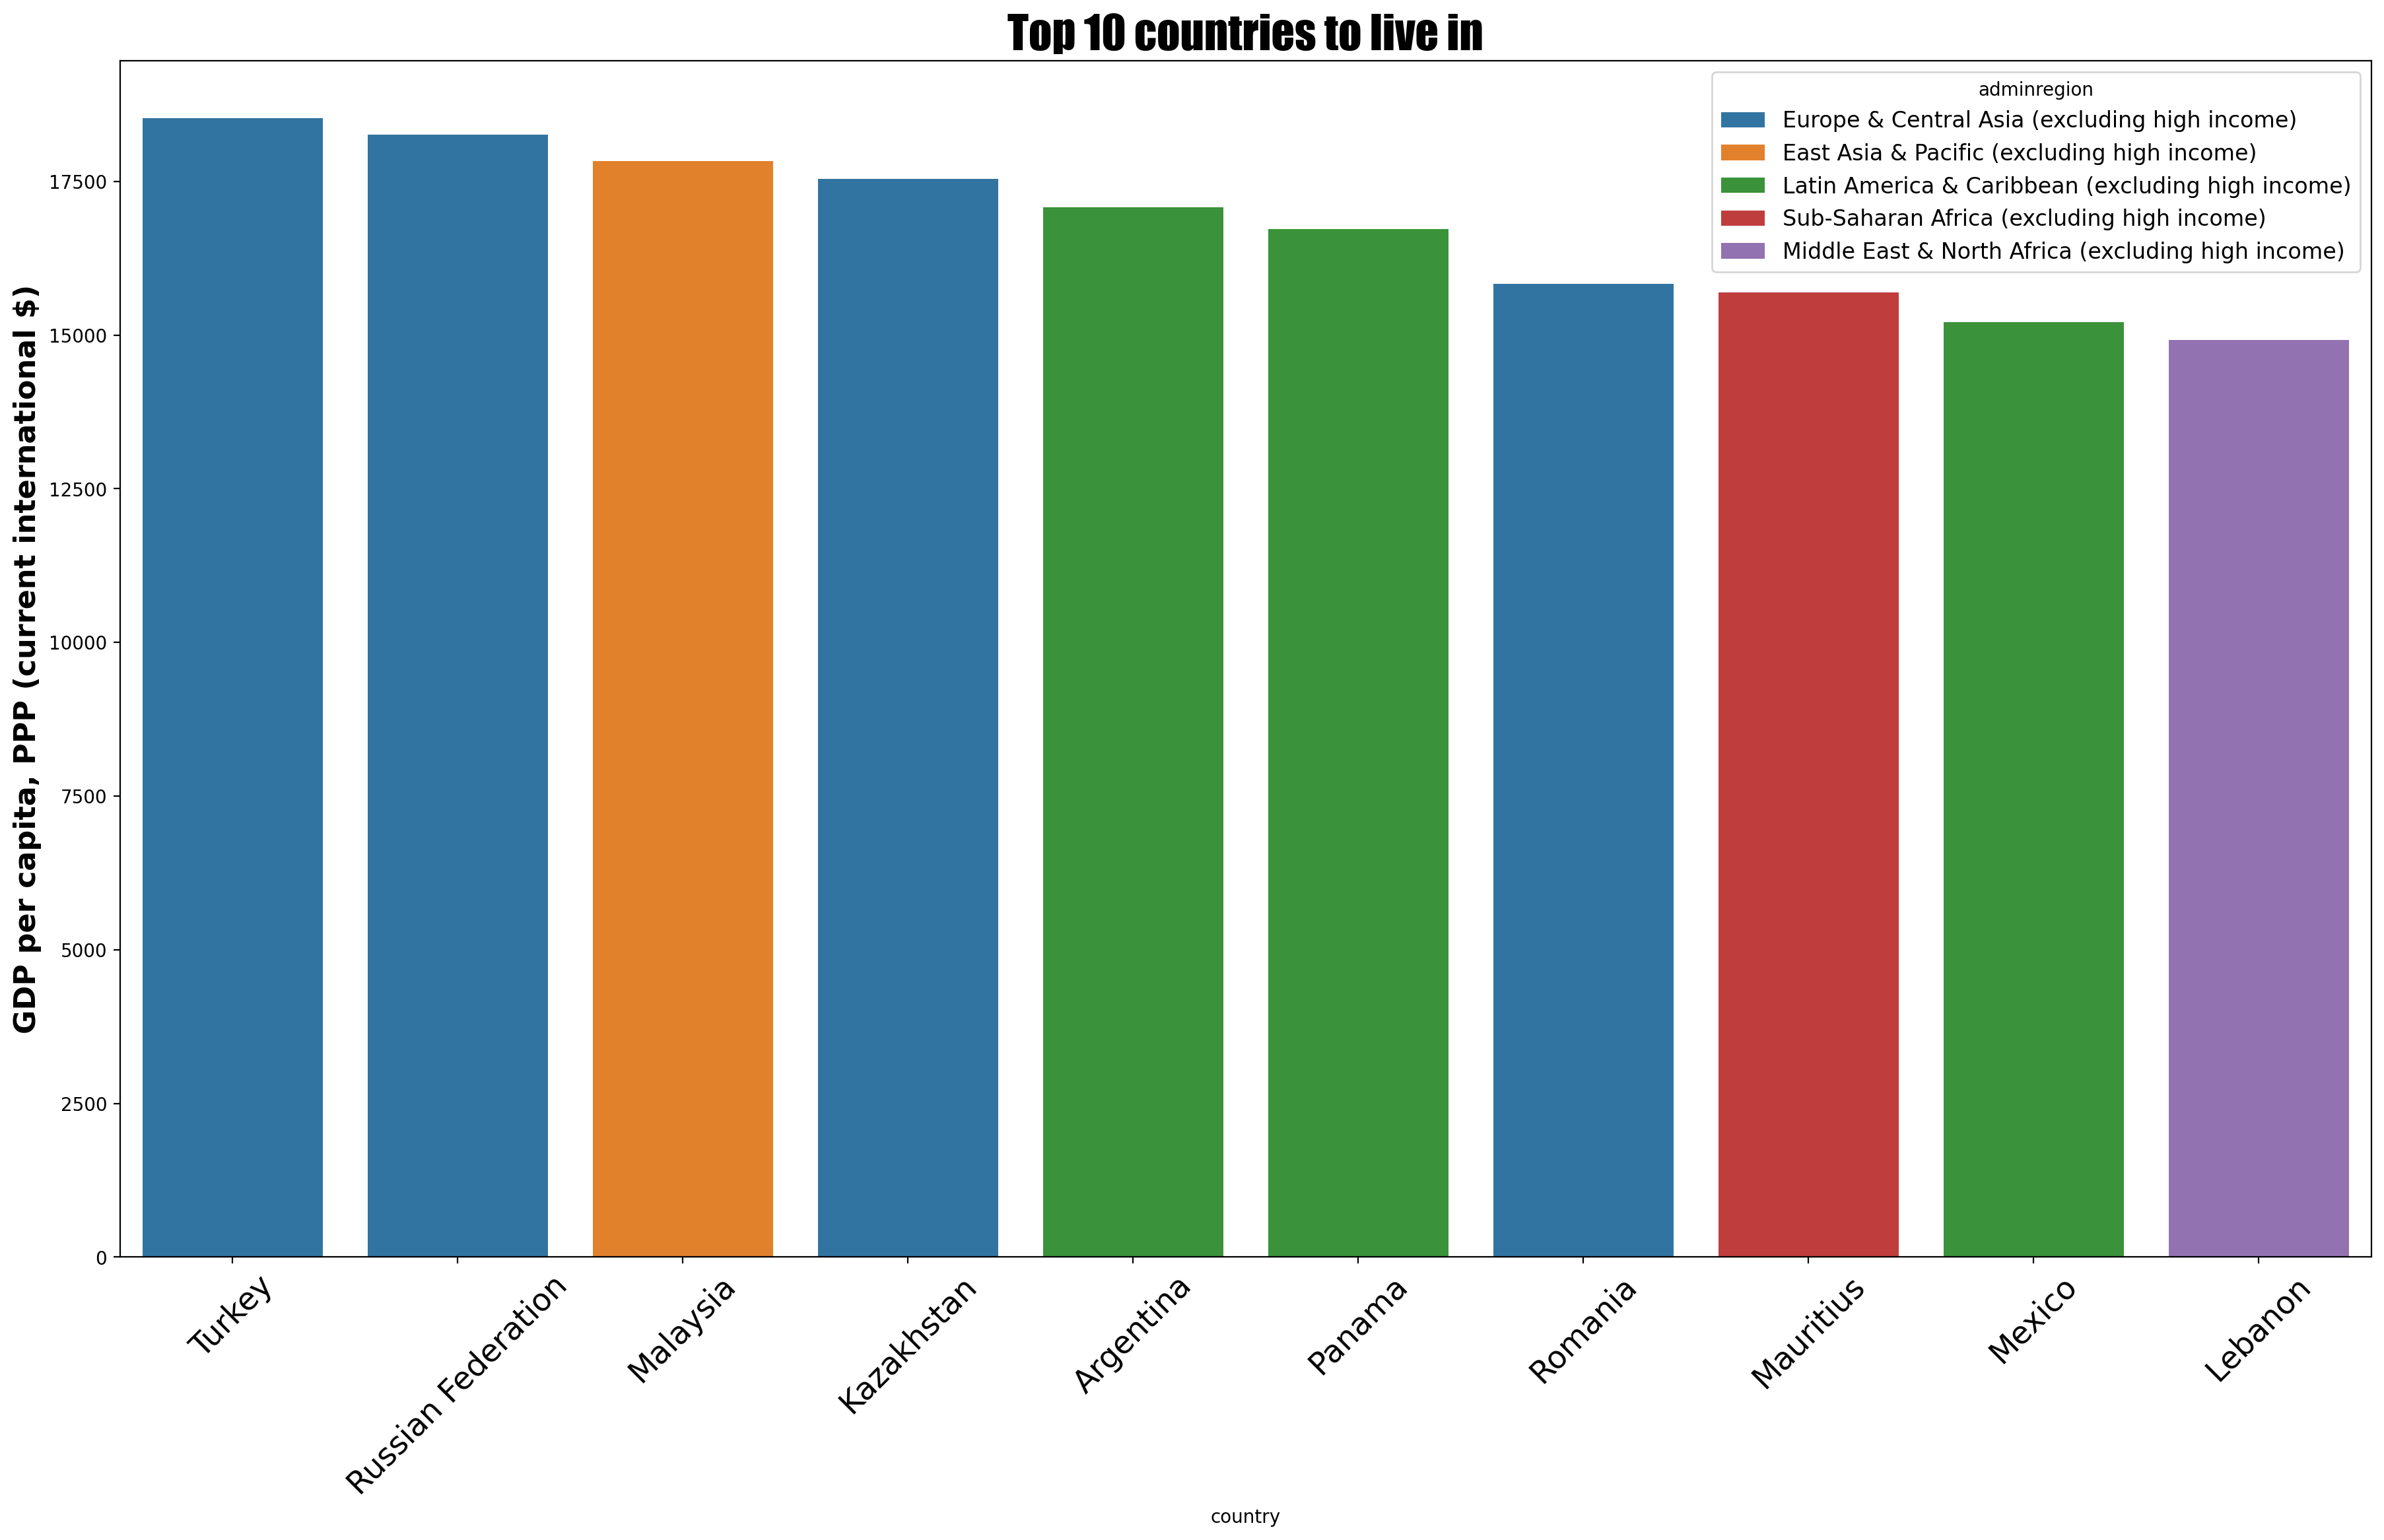

In [33]:
plt.figure(figsize=(22,12), dpi=200)
plt.xticks(rotation=45, fontsize=17)
plt.ylabel("GDP per capita, PPP (current international $)", fontsize=16, weight = "bold")
plt.title("Top 10 countries to live in", fontname="Impact", fontsize=25)
sns.barplot(data = top10_richest_country_to_live_in, y= "GDP per capita, PPP (current international $)", x = "country", hue="adminregion",
            dodge=False)
plt.legend(fontsize=12, title="adminregion")
plt.show()

We use GDP per capita , because GDP per capita is the sum of gross value added by all resident producers in the economy plus any product taxes (less subsidies) not included in the valuation of output, divided by mid-year population. What does it mean if GDP per capita is high? In other words, when an economy generates more value per person per year, that typically translates into more money for those working in that economy. Higher incomes mean families can spend more on the things they value.

In [34]:
country_mean =  suicide_homicide_gdp.groupby(["country","iso3c","adminregion","incomeLevel"])["Suicide mortality rate (per 100,000 population)"].mean().reset_index()
top10_lowest_suicide = country_mean.sort_values("Suicide mortality rate (per 100,000 population)", ascending=True).head(10)
top10_lowest_suicide

,country,iso3c,adminregion,incomeLevel,"Suicide mortality rate (per 100,000 population)"
80,Sao Tome and Principe,STP,Sub-Saharan Africa (excluding high income),Lower middle income,1.516667
46,Jordan,JOR,Middle East & North Africa (excluding high inc...,Upper middle income,1.607692
35,Grenada,GRD,Latin America & Caribbean (excluding high income),Upper middle income,1.900000
45,Jamaica,JAM,Latin America & Caribbean (excluding high income),Upper middle income,1.978947
75,Philippines,PHL,East Asia & Pacific (excluding high income),Lower middle income,2.094737
40,Honduras,HND,Latin America & Caribbean (excluding high income),Lower middle income,2.373684
72,Papua New Guinea,PNG,East Asia & Pacific (excluding high income),Lower middle income,2.390000
98,Turkey,TUR,Europe & Central Asia (excluding high income),Upper middle income,2.492857
42,Indonesia,IDN,East Asia & Pacific (excluding high income),Lower middle income,2.707692
51,Lebanon,LBN,Middle East & North Africa (excluding high inc...,Upper middle income,2.881818


In [35]:
for rows in top10_lowest_suicide.count():
    nose.tools.assert_equal(rows, 10) # TESTING TO MAKE SURE WE GET 10 COUNTRIES

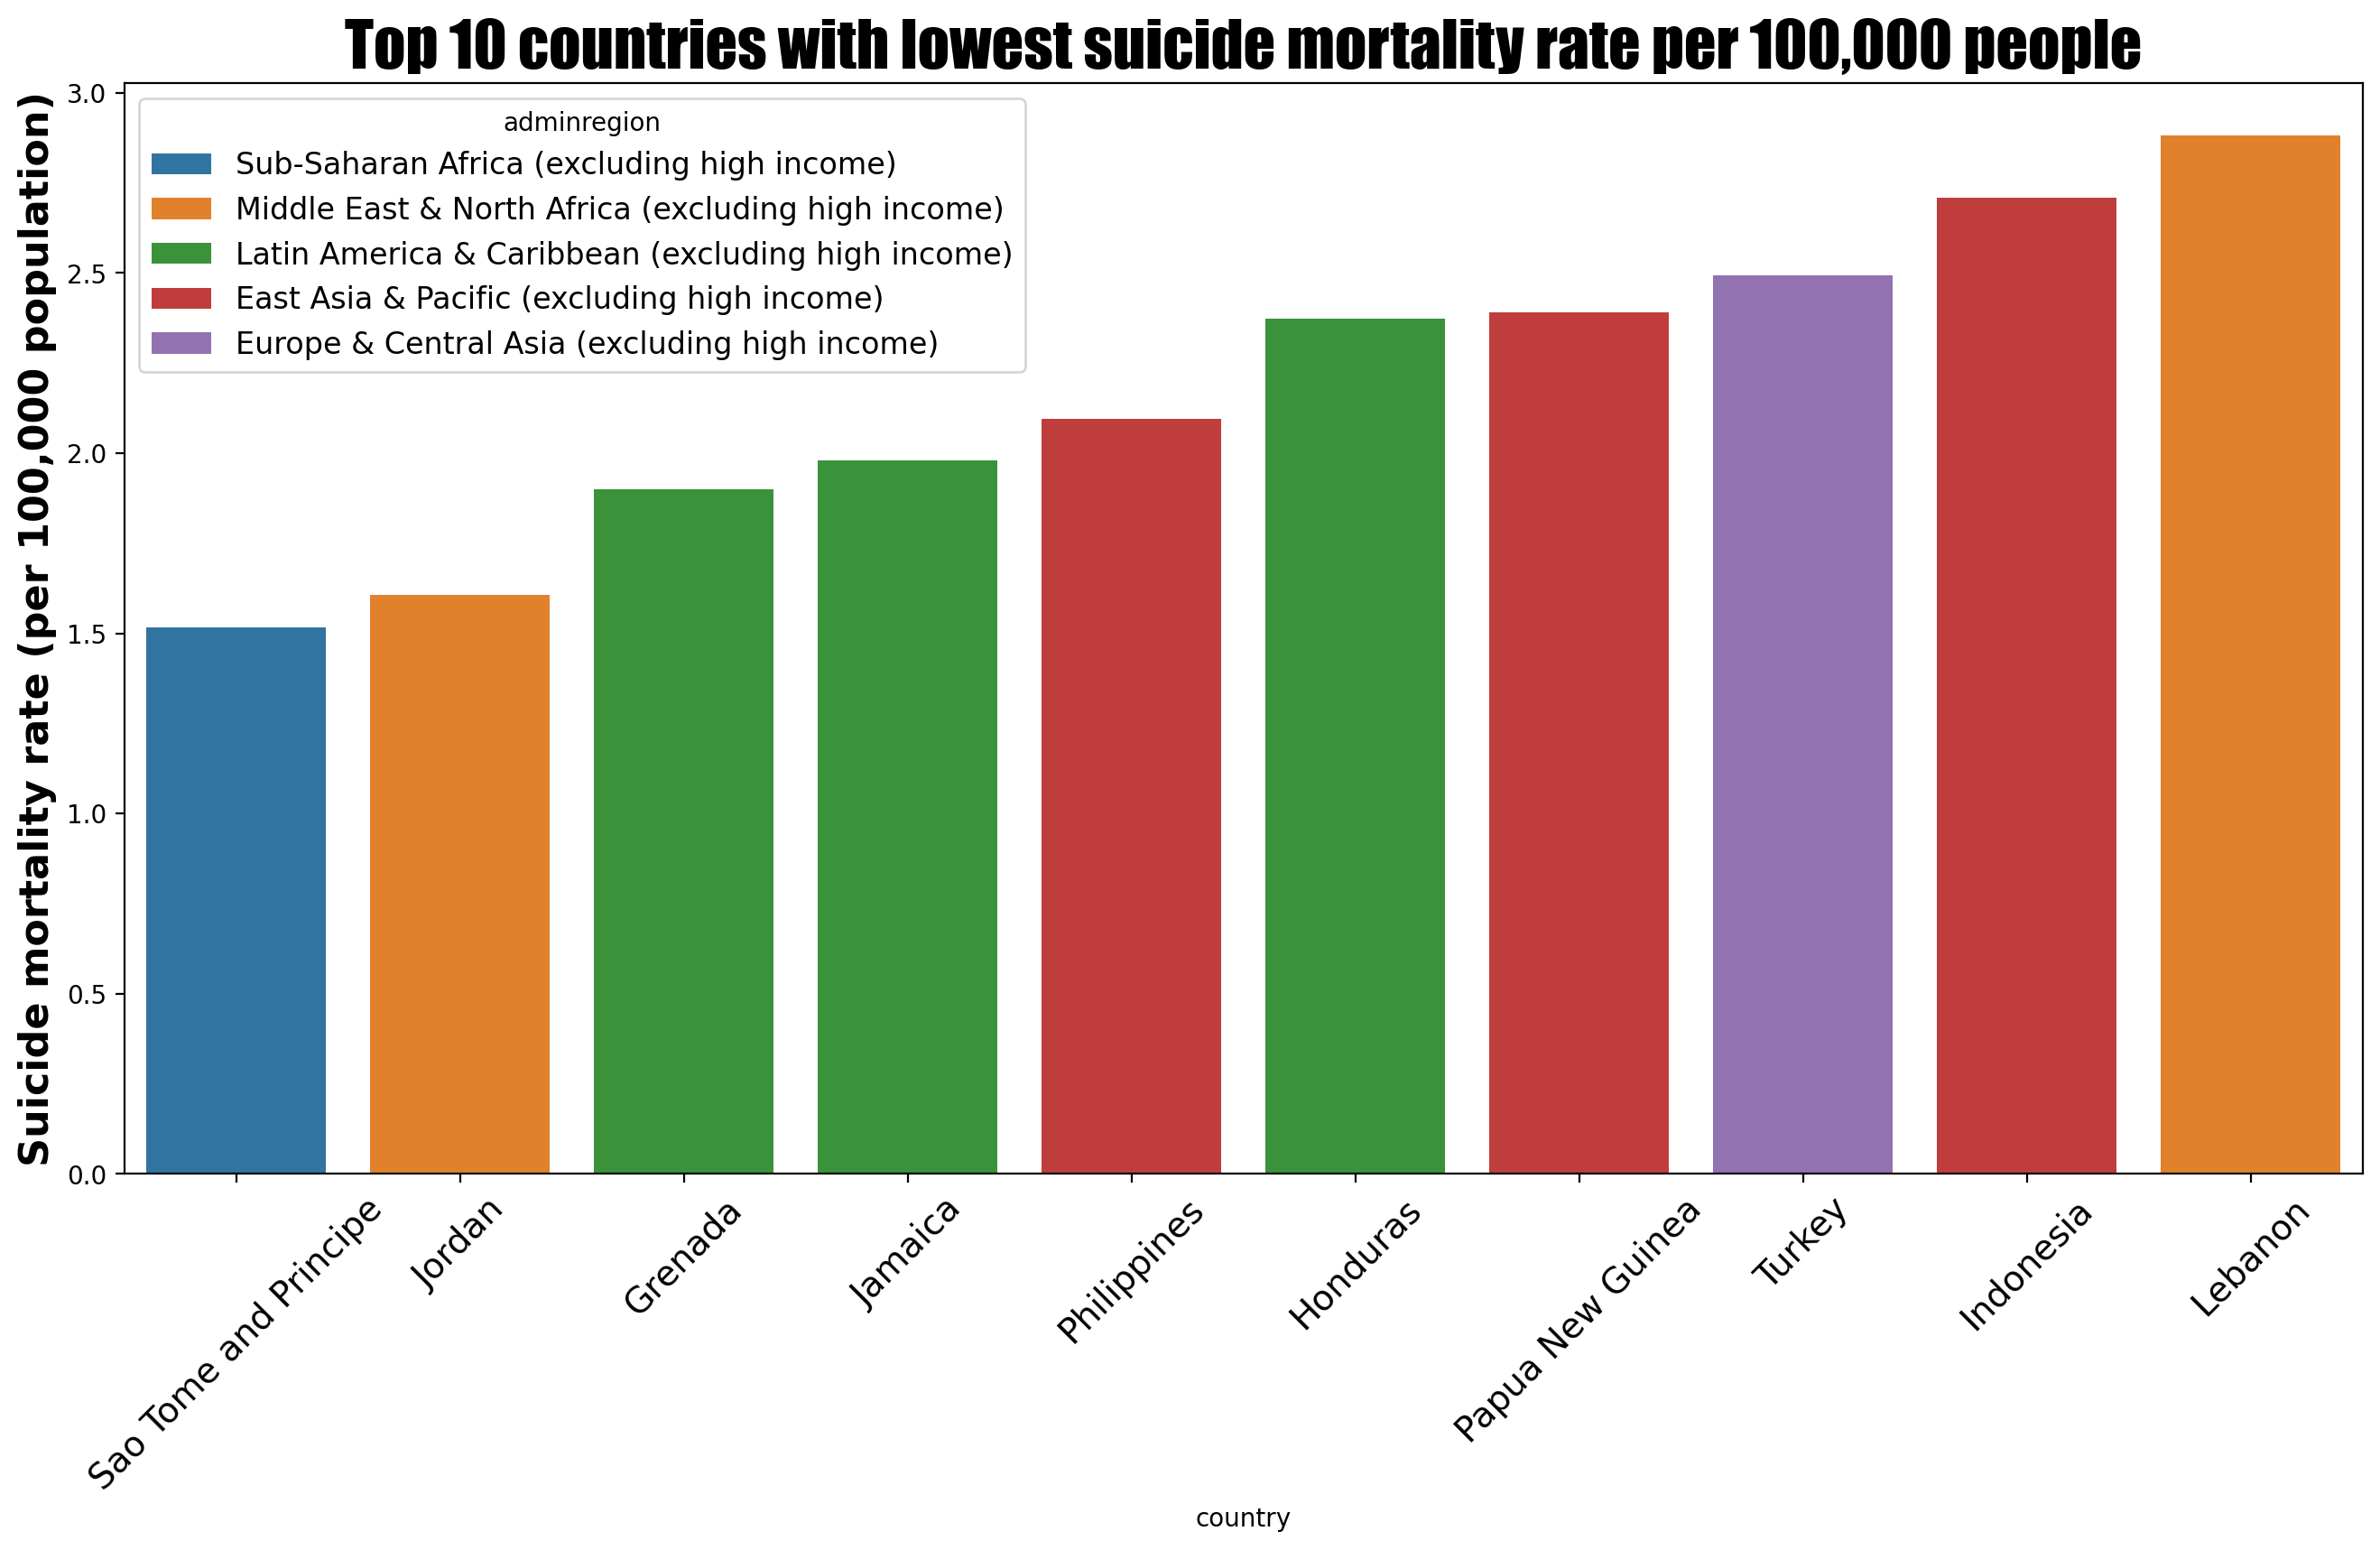

In [36]:
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with lowest suicide mortality rate per 100,000 people", fontname="Impact", fontsize=25)
sns.barplot(data = top10_lowest_suicide, y= "Suicide mortality rate (per 100,000 population)", x = "country", hue="adminregion",
            dodge=False)
plt.legend(fontsize=12, title="adminregion")
plt.show()

#### The countries are really small underdeveloped countries, which can make us think that maybe not all of their suicide are described by their goverment. But what we see is that Turkey is also here giving us really good vibe about the country that may be the best to live in.

# TERRORISM

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'Month'),
  Text(0, 2.5, 'Day'),
  Text(0, 3.5, 'Success'),
  Text(0, 4.5, 'Killed'),
  Text(0, 5.5, 'Wounded')])

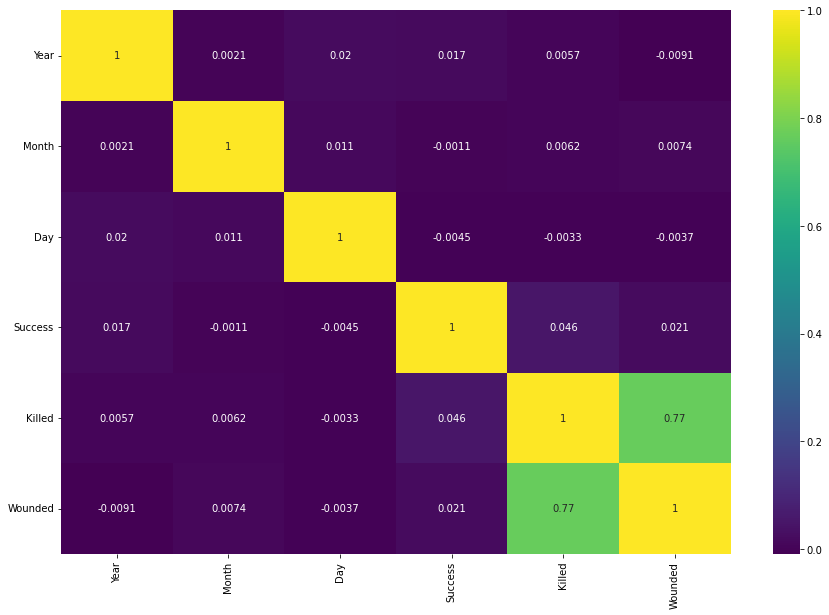

In [37]:
#Correlation Analysis
plt.figure(figsize=(15,10))

sns.heatmap(np.round(global_terrorism.corr(),4), annot=True, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

In [38]:
years_of_attacks = global_terrorism['Year'].value_counts()

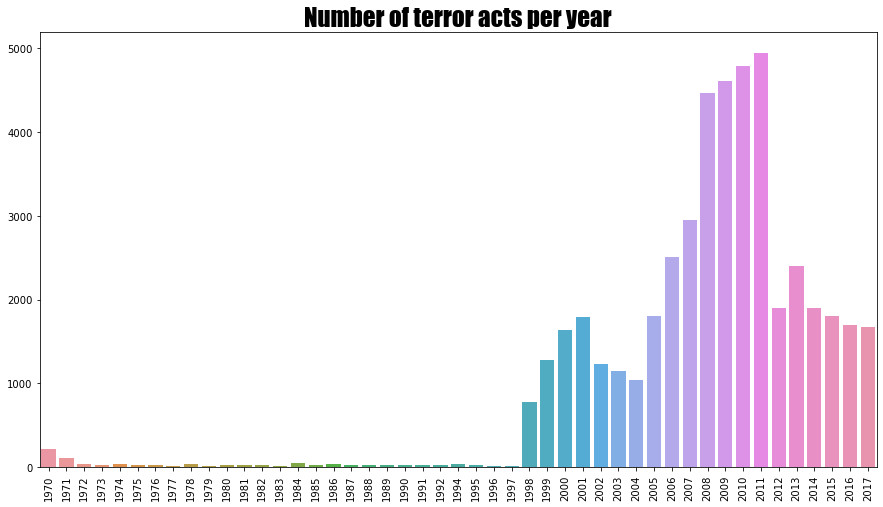

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(x=years_of_attacks.index, y=years_of_attacks.values)
plt.xticks(rotation=90)
plt.title('Number of terror acts per year',fontname="Impact", fontsize=25)
plt.show()

#### From 2008 we've got terrorist attacks boom in till 2012. This barplot disprove our hypothesis about the GDP drops as terrorist attacks growth.Then we have got a constant almost 2000 attacks per year. As we see from the previous graphs we've got growth in GDP from 2008.But this barplot proves one of our hypothesis about the homicide rate , the more terror acts , the more homicide rate over the years, this can leads us to the fact that there is dependency between the two indicators - homicide rate , terror acts.

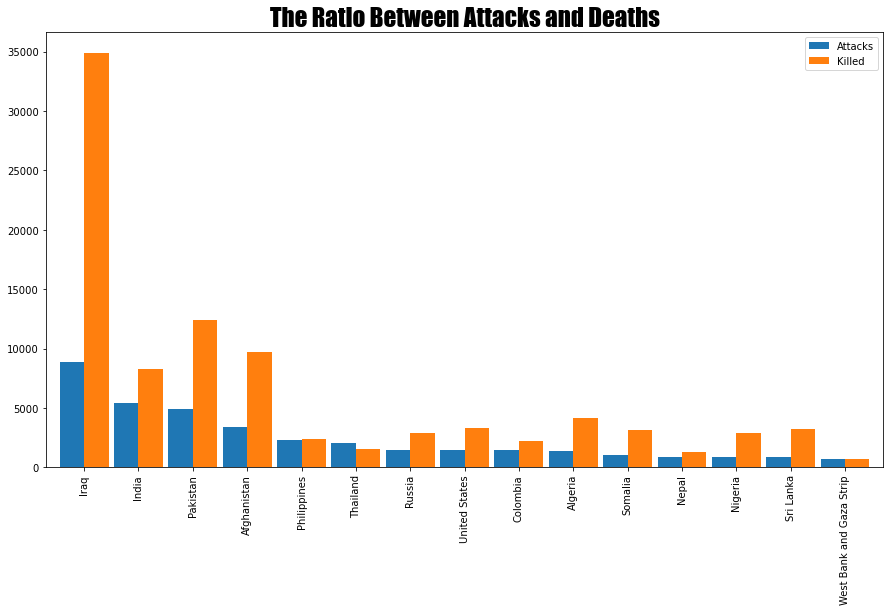

In [40]:
coun_terror=global_terrorism['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=global_terrorism.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title("The Ratio Between Attacks and Deaths", fontname="Impact", fontsize=25)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

#### Iraq has got the most ruthless atacks with insanely bigger rate in killed people comapred to the other 

In [41]:
target_type = global_terrorism['Target_type'].value_counts()
top_10_targets = target_type.head(10)

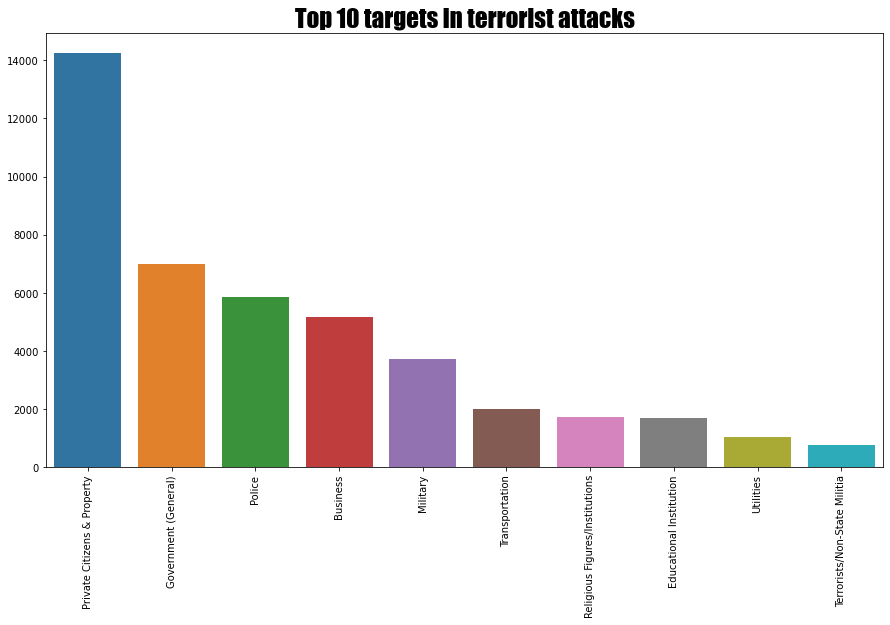

In [42]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_targets.index, y=top_10_targets.values)
plt.xticks(rotation=90)
plt.title('Top 10 targets in terrorist attacks',fontname="Impact", fontsize=25)
plt.show()

#### Primarly innocent citizens are affected. That's why terrorism is really scary because of his rutheless methods causing pain , stress , deaths etc.

In [43]:
countries_attacked = global_terrorism['Country'].value_counts()

In [44]:
top_10_countries_attacked = countries_attacked.head(10)

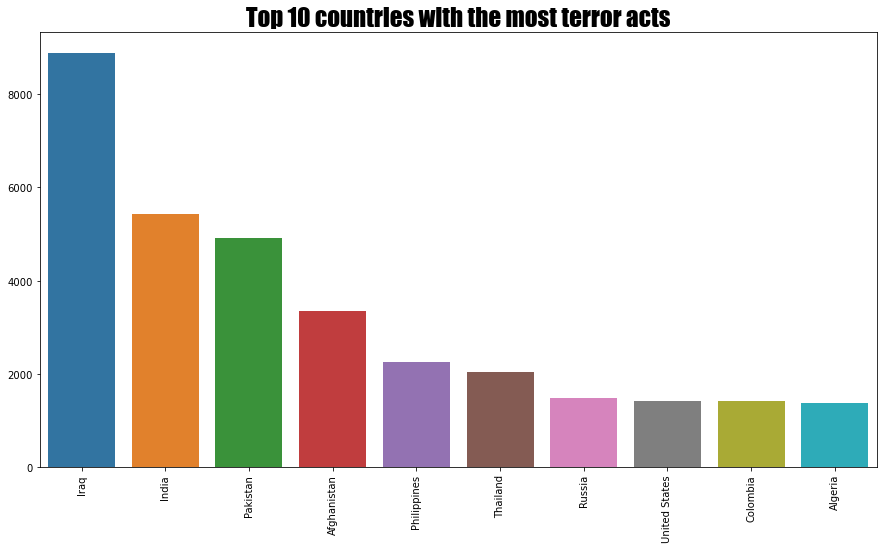

In [45]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_countries_attacked.index, y=top_10_countries_attacked.values)
plt.xticks(rotation=90)
plt.title('Top 10 countries with the most terror acts',fontname="Impact", fontsize=25)
plt.show()

Iraq is islamic country and it is one of the most known countries with their terrorist groups and attacks. We see a big difference from the second country in the list. Columbia and El Salvador are also in the list which proves again our point that terror acts have dependency with the homicide rate of the country. The first 3 countries have an islamic religion well known for the terrorist groups.

In [46]:
atacks_per_region = global_terrorism['Region'].value_counts()

In [47]:
top_10_attacks_per_region = atacks_per_region.head(10)

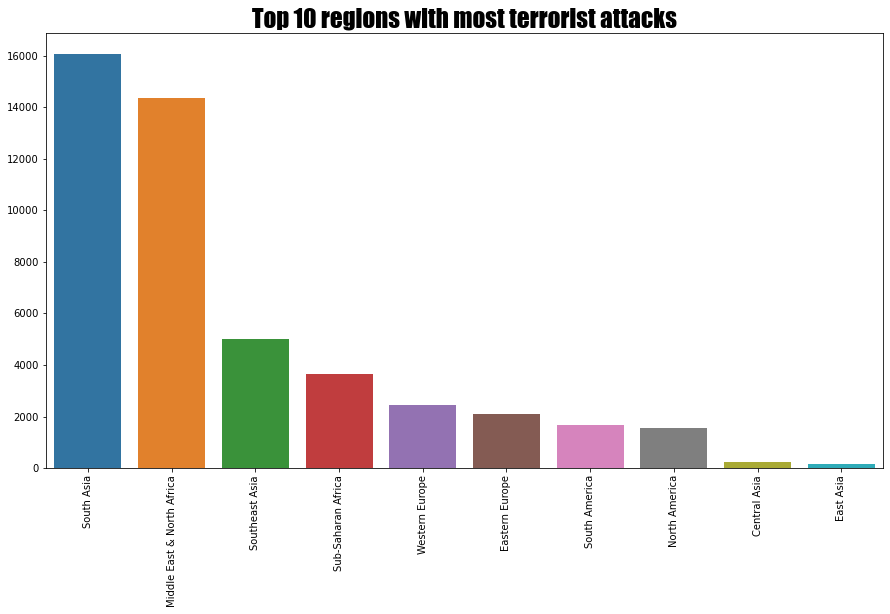

In [48]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_attacks_per_region.index, y=top_10_attacks_per_region.values)
plt.xticks(rotation=90)
plt.title('Top 10 regions with most terrorist attacks',fontname="Impact", fontsize=25)
plt.show()

Nothing new we see here. The islamic countries from MENA and South Asia are on the top of the list with big lead over the next regions.

In [49]:
type_of_attacks = global_terrorism[global_terrorism['AttackType']!='Unknown']['AttackType'].value_counts()

In [50]:
top10_type_of_attacks = type_of_attacks.head(10)

In [51]:
nose.tools.assert_not_equal(top10_type_of_attacks.shape , global_terrorism.shape)

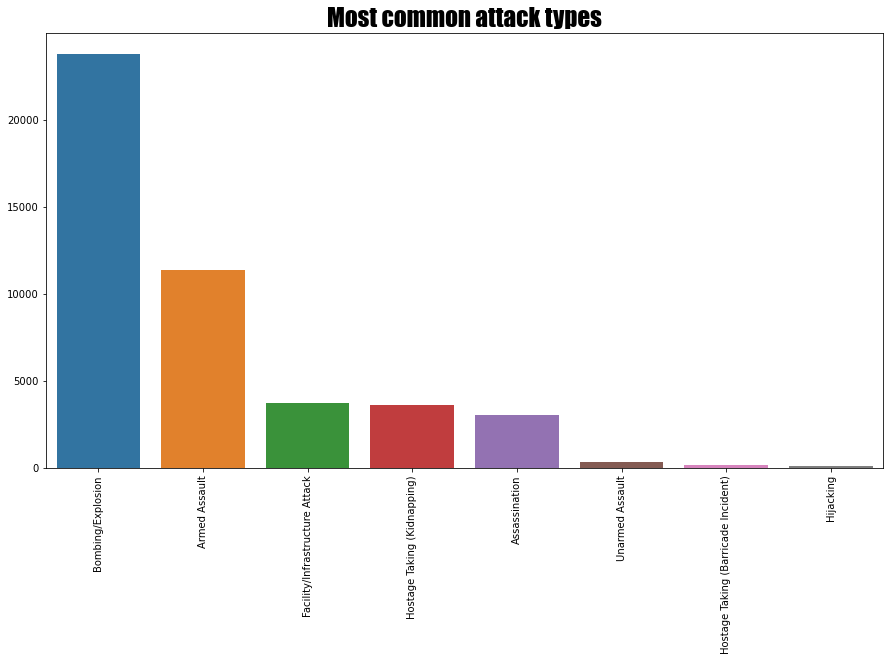

In [52]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top10_type_of_attacks.index, y=top10_type_of_attacks.values)
plt.xticks(rotation=90)
plt.title('Most common attack types',fontname="Impact", fontsize=25)
plt.show()

Explosion and bombs are primarly weapon for attacks used by the islamic groups because it is violent and performs well. The known kamikaze's practise the attacks exactly with bombs/explosions.

In [53]:
group_names = global_terrorism[global_terrorism['Group']!='Unknown']['Group'].value_counts()

In [54]:
nose.tools.assert_not_equal(group_names.shape , global_terrorism.shape) # CHECKING THE PROPER OVERWRITE OF THE NEW DATA

In [55]:
top10_terrorist_groups = group_names.head(10)

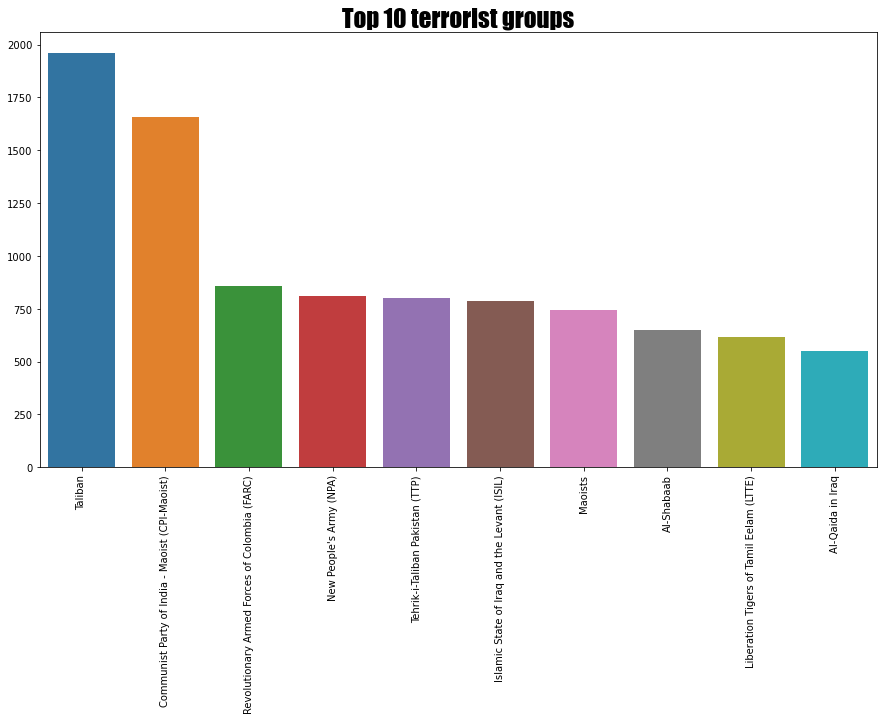

In [56]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top10_terrorist_groups.index, y=top10_terrorist_groups.values)
plt.xticks(rotation=90)
plt.title('Top 10 terrorist groups',fontname="Impact", fontsize=25)
plt.show()

Mainly arabic/islamic groups out there that makes us think that there may be dependency between religon and the terrorist acts of the groups. 

### HEATMAPS

In [57]:
plot_corr = {c: suicide_homicide_gdp.loc[suicide_homicide_gdp['country']==c, :].corr() 
             for c in suicide_homicide_gdp['country'].unique()}

In [58]:
def plot_country_heatmap(country, correlation=plot_corr):
    plot_corr = correlation.get(country)
    ax = sns.heatmap(plot_corr, fmt='.3f', annot=True, cmap='Blues', annot_kws={'fontsize': 15})
    ax.set_title(country)

I defined a simple function which takes a country name and the dictionary with all correlations to plot said country's heatmap.

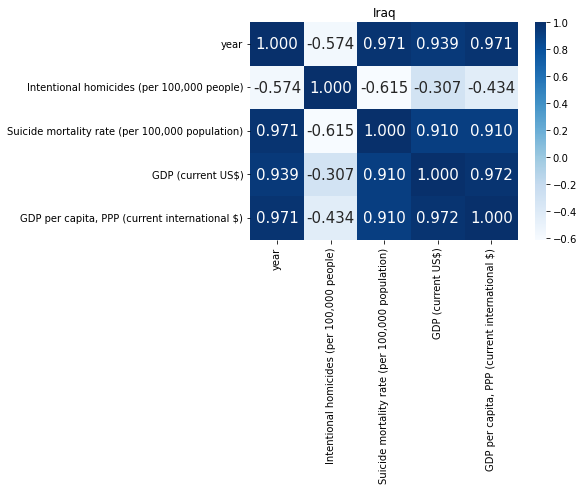

In [59]:
plot_country_heatmap('Iraq', correlation=plot_corr)

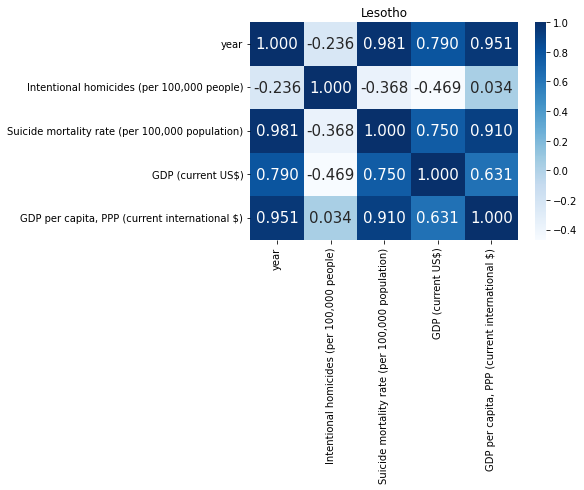

In [60]:
plot_country_heatmap('Lesotho', correlation=plot_corr)

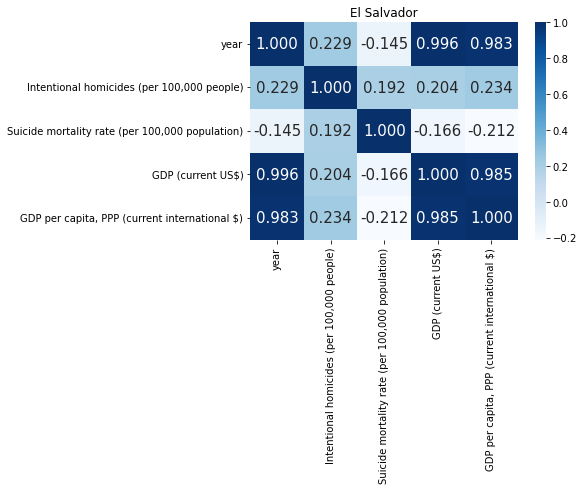

In [61]:
plot_country_heatmap('El Salvador', correlation=plot_corr)

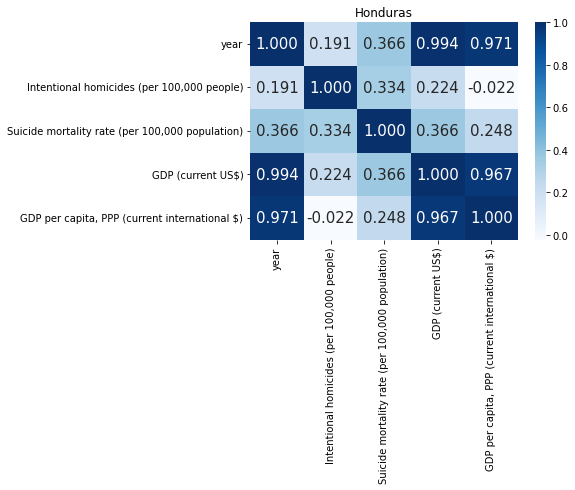

In [79]:
plot_country_heatmap('Honduras', correlation=plot_corr)

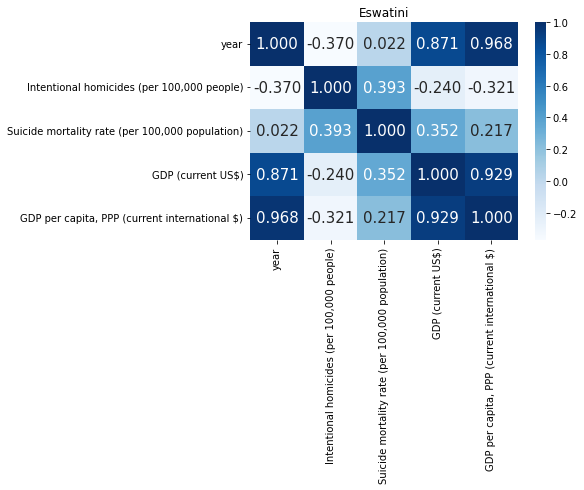

In [63]:
plot_country_heatmap('Eswatini', correlation=plot_corr)

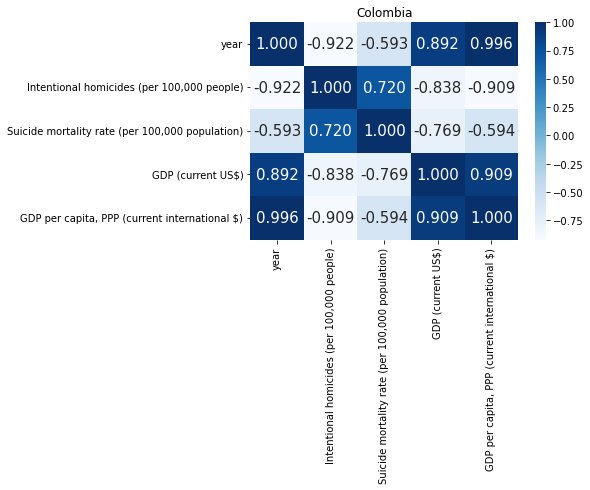

In [64]:
plot_country_heatmap('Colombia', correlation=plot_corr)

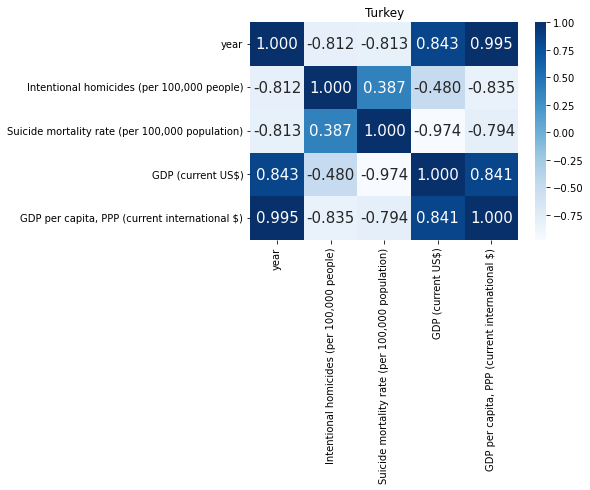

In [65]:
plot_country_heatmap('Turkey', correlation=plot_corr)

# 4. Machine Learning Model

In [66]:
ml_raw_data = pd.read_csv("global_terorism.csv", encoding='ISO-8859-1',low_memory=False)

In [67]:
#Let's get only the columns that will help us with the model
ml_data = ml_raw_data.rename(columns={'iyear':'Year',
                     'imonth':'Month',
                     'iday':'Day',
                     'latitude':'Latitude',
                     'longitude':'Longitude',
                     'multiple':'Multiple',
                     'attacktype1':'AttackType',
                     'suicide':'Suicide',
                     'success':'Success',
                     'targtype1':'TargetType',
                     'individual':'Individual',
                     'nkill':'Killed',
                    'country_txt':'Country',
                        'weaptype1':'WeaponType'})

In [68]:
ml_data = ml_data[['Month','Day','Latitude', 'Longitude','Multiple', 'Success', 'Suicide',
       'AttackType','TargetType',
       'Individual','WeaponType','Killed',"Country"]]

In [69]:
nose.tools.assert_equal(ml_data.shape[1],(13)) #CHEKING THE NEW COLUMNS OVERWRITE WORKS

In [70]:
iraq_data = ml_data[ml_data['Country']=='Iraq']

In [71]:
nose.tools.assert_not_equal(iraq_data.shape , ml_data.shape) # CHECKING THE PROPER OVERWRITE OF THE NEW DATA

In [72]:
iraq_data.isna().sum()

Month           0
Day             0
Latitude      149
Longitude     149
Multiple        0
Success         0
Suicide         0
AttackType      0
TargetType      0
Individual      0
WeaponType      0
Killed        725
Country         0
dtype: int64

In [73]:
iraq_data = iraq_data.fillna(iraq_data['Killed'].value_counts().index[0])
iraq_data = iraq_data.fillna(iraq_data['Longitude'].value_counts().index[0])
iraq_data = iraq_data.fillna(iraq_data['Latitude'].value_counts().index[0])

In [74]:
for column in iraq_data.columns:
    nose.tools.assert_equal(iraq_data[column].isna().sum(), 0) # TESTING TO MAKE SURE WE GET RID OF THE NaN VALUES

In [75]:
X = iraq_data[['Month','Day','Latitude', 'Longitude','Multiple','Suicide','AttackType','TargetType', 'Individual','WeaponType','Killed']]
y = iraq_data['Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =1)


In [76]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f"The probability of success from terrorist attack in Iraq based on variables from our data is : " + 
      str(accuracy_score(y_test, prediction).round(2))+ '%')

The probability of success from terrorist attack in Iraq based on variables from our data is : 0.93%


# 5. Conclusion

### SUICIDE HOMICIDE AND GDP

#### Is there a relationship between GDP and homicide rate among the countries of the world? 
Yes, a negative relationship--stronger when you consider per capita GDP rather than raw GDP. More money, less homicide.

#### Is there a relationship between GDP and suicide? 
A slight positive relationship. (More money, more suicide.)

#### Is there a relationship between suicide rate and homicide rate? 
Inconclusive.

#### What is the best country to leave in based on the economy and terrorist attacks? 
Turkey. It may be in the top 10 most terror acts but on the last spot with low number of acts. They have good economy that can provide better life with low homicide rate.

### TERRORISM

#### When we start to see terror acts growth ? 
In 2012 to nowadays we see growth in the number of terror acts comapared to previous years. Terrorists have a peak in 2014 commonly in Iraq and Syria. Due to all this attacks in 2014 we have a GDP decline in 2015.

#### Which are the most affected regions ?
Middle East and North Africa(MENA) & South Asia due to their islamic countries that contain a lot of terrorist groups in it and also the biggest terrorist groups are based in those regions.

#### How they attack the most ?
Bomb and explosions are the most common method for terrorist to proceed with their attacks. It is ruthless and effective , cheap and clearly the best choice for them. That's why Iraq has got the biggest rate of killing people due to attacks in the country made by terrorist groups.

#### How it affects the countries ? 
It is making growth in the homicide rate of the countries affected by terrorism. Due to that people don't want live in that countries affected by terrorism and homicide.

# 6. Refferences

## Educational part
#### 1.[Terrorism impacts on economy](https://www.degruyter.com/document/doi/10.1515/peps-2020-0031/html)
#### 2. [Terrorism impact on mental health](https://www.frontiersin.org/articles/10.3389/fpsyt.2019.00744/full)
#### 3. [How GDP per capita measure or well-being](https://www.businesscouncilab.com/work/how-well-does-gdp-per-capita-really-measure-our-well-being/)
#### 4. [Islamic terrorism](https://en.wikipedia.org/wiki/Islamic_terrorism)
#### 5. [Most common terrorism impacts on countries](https://www.investopedia.com/articles/markets/080216/top-5-ways-terrorism-impacts-economy.asp)


## Technical part
#### 1. [Scikit-learn](https://scikit-learn.org/stable/index.html)
#### 2. [Unit-testing](https://mungingdata.com/pandas/unit-testing-pandas/)
#### 3. [Pandas functions for EDA](https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/)
#### 4. [Plotting with pandas](https://neptune.ai/blog/pandas-plot-deep-dive-into-plotting-directly-with-pandas)
#### 5. [ML introduction](https://towardsdatascience.com/introduction-to-probabilistic-classification-a-machine-learning-perspective-b4776b469453)

## Datasets
#### 1.[Global terrorism dataset(Kaggle)](https://www.kaggle.com/datasets/START-UMD/gtd)
#### 2.[Suicide,homicide,GDP dataset(Kaggle)](https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp)